# 1. Install Dependencies and Setup

In [1]:
!pip install tensorflow tensorflow-gpu opencv-python matplotlib

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Obtaining dependency information for opencv-python from https://files.pythonhosted.org/packages/c7/ec/9dabb6a9abfdebb3c45b0cc52dec901caafef2b2c7e7d6a839ed86d81e91/opencv_python-4.9.0.80-cp37-abi3-win_amd64.whl.metadata
   ---------------------------------------- 0.0/38.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.6 MB 1.9 MB/s eta 0:00:21
   ---------------------------------------- 0.3/38.6 MB 4.7 MB/s eta 0:00:09
    --------------------------------------- 0.8/38.6 MB 6.4 MB/s eta 0:00:06
   - -------------------------------------- 1.4/38.6 MB 7.8 MB/s eta 0:00:05
   - -------------------------------------- 1.9/38.6 MB 9.3 MB/s eta 0:00:04
   -- ------------------------------------- 2.4/38.6 MB 9.7 MB/s eta 0:00:04
   -- ------------------------------------- 2.7/38.6 MB 9.7 MB/s eta 0:00:04
   -- ------------------------------------- 2.8/38.6 MB 8.0 MB/s eta

  error: subprocess-exited-with-error
  
  python setup.py bdist_wheel did not run successfully.
  exit code: 1
  
  [18 lines of output]
  Traceback (most recent call last):
    File "<string>", line 2, in <module>
    File "<pip-setuptools-caller>", line 34, in <module>
    File "C:\Users\Maciej\AppData\Local\Temp\pip-install-_0weyydy\tensorflow-gpu_bff7264b1777414c84f907aabe33b967\setup.py", line 37, in <module>
      raise Exception(TF_REMOVAL_WARNING)
  Exception:
  
  The "tensorflow-gpu" package has been removed!
  
  Please install "tensorflow" instead.
  
  Other than the name, the two packages have been identical
  since TensorFlow 2.1, or roughly since Sep 2019. For more
  information, see: pypi.org/project/tensorflow-gpu
  
  
  [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for tensorflow-gpu
ERROR: Could not build wheels for tensorflow-gpu, which is required to install pyproject.toml

In [2]:
!pip list

Package                      Version
---------------------------- ---------------
absl-py                      2.1.0
anyio                        4.2.0
argon2-cffi                  23.1.0
argon2-cffi-bindings         21.2.0
arrow                        1.3.0
asttokens                    2.4.1
astunparse                   1.6.3
async-lru                    2.0.4
attrs                        23.2.0
Babel                        2.14.0
beautifulsoup4               4.12.3
bleach                       6.1.0
cachetools                   5.3.2
certifi                      2023.11.17
cffi                         1.16.0
charset-normalizer           3.3.2
colorama                     0.4.6
comm                         0.2.1
contourpy                    1.2.0
cycler                       0.12.1
debugpy                      1.8.0
decorator                    5.1.1
defusedxml                   0.7.1
executing                    2.0.1
fastjsonschema               2.19.1
filelock                     3


[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import tensorflow as tf
import os

In [4]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [5]:
tf.config.list_physical_devices('GPU')

[]

# 2. Remove dodgy images

In [7]:
data_dir = 'data' 

In [8]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [9]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

Issue with image data\happy\05-12-21-happy-people.jpg
Issue with image data\happy\07-120104-happy_people_are_not_nice_people.jpg
Issue with image data\happy\1-2.jpg
Issue with image data\happy\1000_F_42220133_toAU6USGY9jVr2XJFLssfG00cSYIJ173.jpg
Issue with image data\happy\11-Habits-of-Truly-Happy-People.jpg
Issue with image data\happy\154006829.jpg
Issue with image data\happy\170404-happy-workers-feature.jpg
Issue with image data\happy\1902539.jpg
Issue with image data\happy\1902540.jpg
Issue with image data\happy\1902587.jpg
Issue with image data\happy\1920px-face-smile.svg_.png.jpg
Issue with image data\happy\1HEoLBLidT2u4mhJ0oiDgig.png
Issue with image data\happy\227-2271622_happy-people-business-team-celebrating-png.png
Issue with image data\happy\60632274._UY200_.jpg
Issue with image data\happy\7-Habits-of-Happy-People-image.jpeg
Issue with image data\happy\7-principles-of-successful-and-happy-people.png
Issue with image data\happy\7Y57w0983emdERAoQylUHIGkoEk1cIFvPkXDbeA2lVA.jpg


# 3. Load Data

In [10]:
import numpy as np
from matplotlib import pyplot as plt

In [11]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 305 files belonging to 2 classes.


In [12]:
data_iterator = data.as_numpy_iterator()

In [13]:
batch = data_iterator.next()

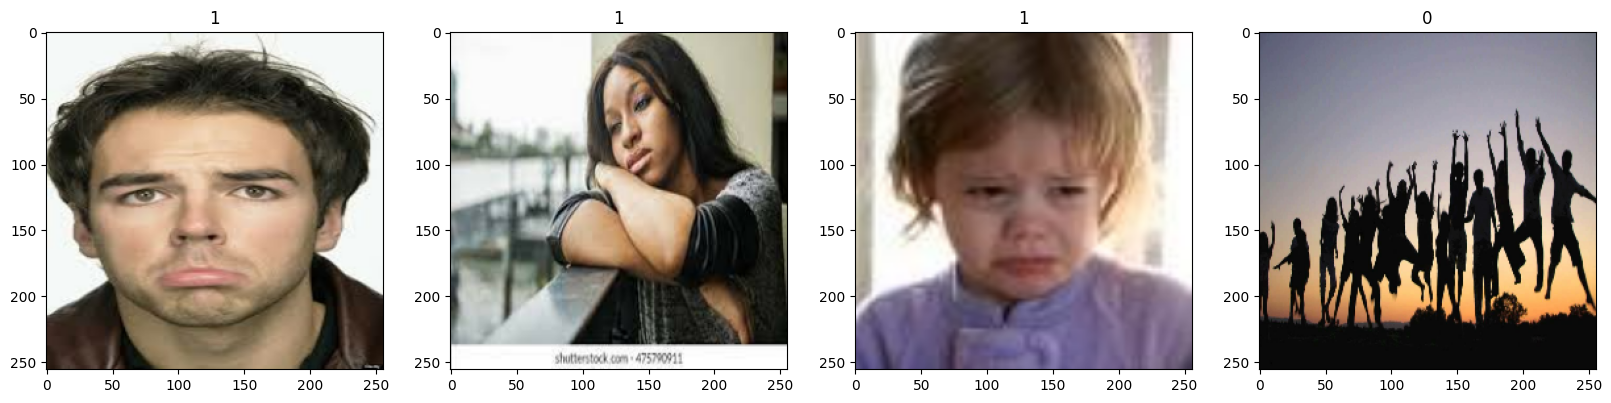

In [14]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# 4. Scale Data

In [15]:
data = data.map(lambda x,y: (x/255, y))

In [16]:
data.as_numpy_iterator().next()

(array([[[[0.69803923, 0.6745098 , 0.5882353 ],
          [0.69702816, 0.67349875, 0.58722425],
          [0.6924326 , 0.6689032 , 0.58262867],
          ...,
          [0.56246936, 0.55070466, 0.484038  ],
          [0.5578738 , 0.5461091 , 0.4794424 ],
          [0.5568628 , 0.54509807, 0.47843137]],
 
         [[0.6977022 , 0.6741728 , 0.5878983 ],
          [0.69669116, 0.67316175, 0.58688724],
          [0.6920956 , 0.66856617, 0.58229166],
          ...,
          [0.562967  , 0.5512023 , 0.4845356 ],
          [0.55823976, 0.54647505, 0.47980836],
          [0.5571998 , 0.5454351 , 0.47876838]],
 
         [[0.69617033, 0.6726409 , 0.5863664 ],
          [0.6951593 , 0.6716299 , 0.5853554 ],
          [0.69056374, 0.6670343 , 0.5807598 ],
          ...,
          [0.5652289 , 0.5534642 , 0.4867975 ],
          [0.55990326, 0.54813856, 0.48147187],
          [0.5587316 , 0.5469669 , 0.48030025]],
 
         ...,
 
         [[0.43679535, 0.35836396, 0.2524816 ],
          [0.43713

# 5. Split Data

In [17]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [18]:
train_size

7

In [19]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# 6. Build Deep Learning Model

In [20]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [22]:
model = Sequential()

In [23]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [24]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

# 7. Train

In [26]:
logdir='logs'

In [27]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [28]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20


7/7 [==============================] - 5s 404ms/step - loss: 1.0793 - accuracy: 0.5089 - val_loss: 0.6553 - val_accuracy: 0.4844
Epoch 2/20
7/7 [==============================] - 3s 354ms/step - loss: 0.6546 - accuracy: 0.5536 - val_loss: 0.6969 - val_accuracy: 0.5625
Epoch 3/20
7/7 [==============================] - 3s 359ms/step - loss: 0.6535 - accuracy: 0.5938 - val_loss: 0.6071 - val_accuracy: 0.5625
Epoch 4/20
7/7 [==============================] - 3s 370ms/step - loss: 0.6216 - accuracy: 0.6116 - val_loss: 0.5927 - val_accuracy: 0.7656
Epoch 5/20
7/7 [==============================] - 3s 366ms/step - loss: 0.5616 - accuracy: 0.7143 - val_loss: 0.4902 - val_accuracy: 0.8281
Epoch 6/20
7/7 [==============================] - 3s 353ms/step - loss: 0.5634 - accuracy: 0.6830 - val_loss: 0.5909 - val_accuracy: 0.6250
Epoch 7/20
7/7 [==============================] - 3s 382ms/step - loss: 0.4789 - accuracy: 0.8214 - val_loss: 0.3960 - val_accuracy: 0.9375
Epoch 8/20
7/7 [==

# 8. Plot Performance

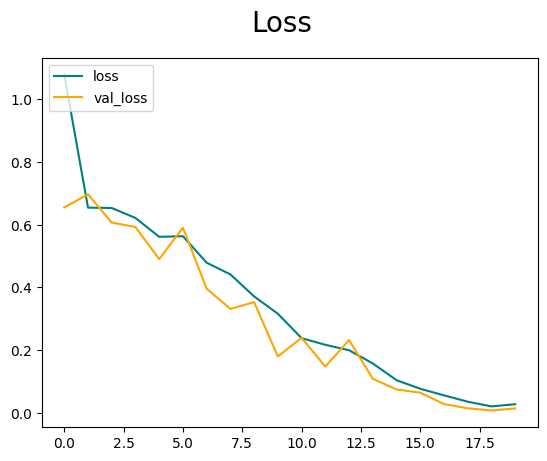

In [34]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

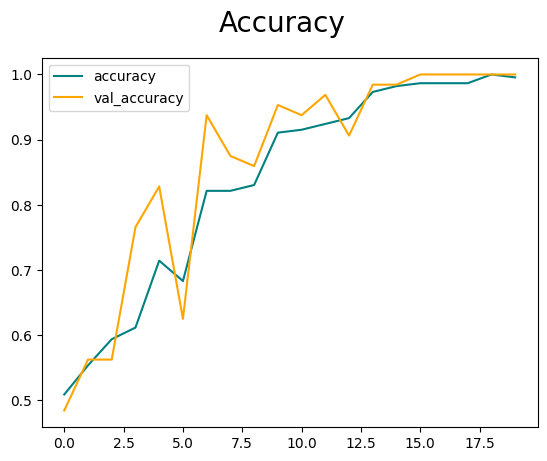

In [35]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 9. Evaluate

In [36]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [37]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [38]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 40ms/step


In [39]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


# 10. Test

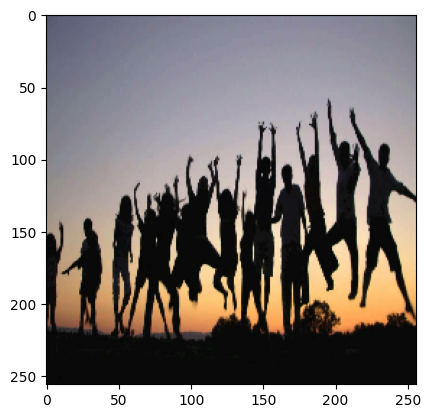

In [42]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [43]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 21ms/step


In [44]:
yhat

array([[1.4114701e-10]], dtype=float32)

In [45]:
if yhat > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Happy
